# Comcast Customer Service - Just Exploratory Data Analysis 

In [4]:
##############################################################################################################
# Import Pandas library for reading the comcast file and for other purpose
##############################################################################################################
import pandas as pd

In [5]:
##############################################################################################################
# Read the comcast file using pandas
##############################################################################################################
com = pd.read_csv('./datasets/Comcast_telecom_complaints_data.csv')

In [6]:
##############################################################################################################
# check the datatypes, number of rows,columns, and null values in the input file
##############################################################################################################
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


### No null values in the file as we see above

In [7]:
##############################################################################################################
# check the descriptive statistics of the input files all fields
##############################################################################################################
com.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


### Georgia is top state with complaints and June-24-2015 was the day with top complaints
### Atlanta is the top city with majority complaints

In [8]:
##############################################################################################################
# check the unique values in the status filed
##############################################################################################################
com.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [9]:
##############################################################################################################
# check the value counts in the status filed
##############################################################################################################
com.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

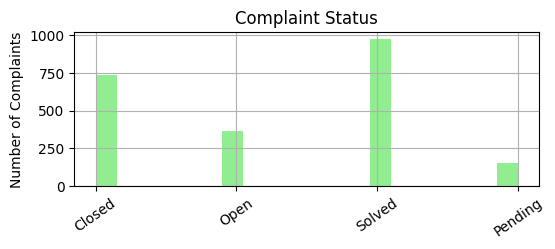

In [10]:
##############################################################################################################
# plot the histogram of the counts from status field
##############################################################################################################
import matplotlib.pyplot as plt
com.Status.hist(xrot=35,figsize=(6,2),legend=False,bins=20,color='lightgreen')
plt.title('Complaint Status')
plt.ylabel('Number of Complaints')
plt.show()

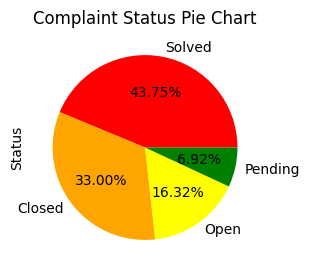

In [66]:
##############################################################################################################
# plot the histogram of the counts from status field
##############################################################################################################

com.Status.value_counts().plot(kind='pie',autopct="%0.2f%%",colors=['red','orange','yellow','green'],figsize=(6,3))
plt.title('Complaint Status Pie Chart')

plt.show()

### Solved and closed are far more than open and pending

In [12]:
##############################################################################################################
# check the unique values in the 'Received Via' field
##############################################################################################################
com['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

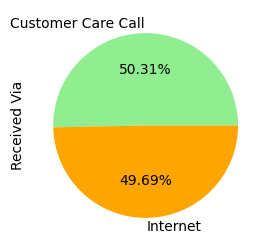

In [71]:
##############################################################################################################
# check the unique values in the 'Received Via' field
##############################################################################################################
plt.figure(figsize=(6,3))
com['Received Via'].value_counts().plot(kind='pie',autopct="%0.2f%%",colors=['lightgreen','orange'])
plt.show()

In [14]:
##############################################################################################################
# Create new numeric field 'New_Filing' from the old string field 'filing on Behalf of Someone' field
##############################################################################################################
com['New_Filing'] = com['Filing on Behalf of Someone'].apply(lambda x: 1 if x=='Yes' else 0)

In [15]:
##############################################################################################################
# check the first 5 records after creating the new field
##############################################################################################################
com.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Filing
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,0
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,0
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,1
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,1
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,0


In [16]:
##############################################################################################################
# Create a new function to convert the open and pending to open, and closed and resolved to closed values
##############################################################################################################
def fun_new_status(row):
    if row.Status in ['Closed','Solved']:
        return 'Closed'
    else:
        return 'Open'
    
com['New_Status'] = com.apply(lambda row: fun_new_status(row), axis=1)

In [17]:
##############################################################################################################
# Convert the object date to datetime field and create other date variables as required
##############################################################################################################
com['Date'] = pd.to_datetime(com['Date'])
com['Year'] = com['Date'].dt.year
com['Month'] = com['Date'].dt.month
com['Month'] = com['Month'].astype(int)
com['Year'] = com['Year'].astype(int)


com['Date_month_year'] = pd.to_datetime(com['Date_month_year'])

In [18]:
##############################################################################################################
# Drop null values if any
##############################################################################################################
com = com.dropna()

In [19]:
##############################################################################################################
# sort the data using the newly created datatime filed
##############################################################################################################
com_sort = com.sort_values('Date_month_year',ascending=False)

In [20]:
##############################################################################################################
# Set new index to the file on the newly created data field
##############################################################################################################
com_sort = com_sort.set_index('Date_month_year') 

In [21]:
##############################################################################################################
# check the first 5 records after creating the new index
##############################################################################################################
com_sort.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Filing,New_Status,Year,Month
Date_month_year,,,,,,,,,,,,,,
2015-12-06,337985,HBO shouldn't have a load time,2015-06-12,5:28:32 PM,Customer Care Call,Indianapolis,Indiana,46268,Solved,No,0,Closed,2015,6
2015-12-06,338283,monthly data caps,2015-06-12,7:31:37 PM,Customer Care Call,Gadsden,Alabama,35901,Solved,No,0,Closed,2015,6
2015-12-06,338606,Internet connection outage,2015-06-12,11:52:11 PM,Customer Care Call,Clarkston,Michigan,48346,Solved,No,0,Closed,2015,6
2015-12-06,337972,Comcast is a downright awful service provider.,2015-06-12,5:21:59 PM,Internet,Redmond,Washington,98053,Open,No,0,Open,2015,6
2015-12-06,337869,Wasted Time and money!,2015-06-12,4:50:15 PM,Customer Care Call,Medley,Florida,33178,Solved,No,0,Closed,2015,6


In [22]:
##############################################################################################################
# Delete all unwanted fileds
##############################################################################################################
com_sort = com_sort.drop(['Filing on Behalf of Someone','Ticket #','Status','Time','Year','Month'],axis=1)

In [23]:
##############################################################################################################
# check sample 5 records after deleting the unwanted fields
##############################################################################################################
com_sort.sample(5)

,Customer Complaint,Date,Received Via,City,State,Zip code,New_Filing,New_Status
Date_month_year,,,,,,,,
2015-06-17,constant internet issues,2015-06-17,Internet,Chelsea,Massachusetts,2150,0,Closed
2015-06-23,Predatory Monopolistic Pricing,2015-06-23,Customer Care Call,Sykesville,Maryland,21784,0,Closed
2015-05-15,Comcast Wifi Issues,2015-05-15,Internet,Chicago,Illinois,60630,0,Closed
2015-06-24,Tucson Comcast Data Caps on Internet Service,2015-06-24,Customer Care Call,Tucson,Arizona,85718,0,Open
2015-04-05,Comcast Service and customer service represent...,2015-05-04,Internet,Bensalem,Pennsylvania,19020,0,Closed


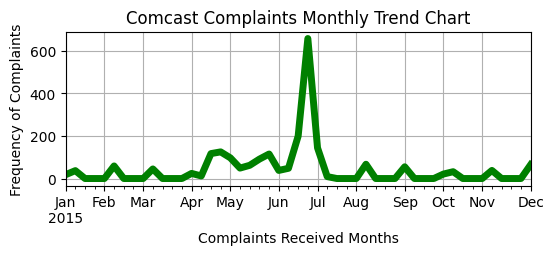

In [24]:
##############################################################################################################
# group the data by month to plot the monthly trend of complaints 
##############################################################################################################
com_sort.groupby(pd.Grouper(freq='W')).size().plot(lw=5,color='g',figsize=(6,2))
plt.xlabel('Complaints Received Months')
plt.ylabel('Frequency of Complaints')
plt.title('Comcast Complaints Monthly Trend Chart')
plt.grid(True)
plt.show()

# Every month first week received more complaints compared to other days
# End of June was the peak month during which lot of complaints received

In [25]:
##############################################################################################################
# check the top 10 days of complaints received in year 2015
##############################################################################################################
com_sort.Date.value_counts().head(10)

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
2015-06-18     47
2015-06-12     43
2015-06-27     39
2015-06-15     34
Name: Date, dtype: int64

In [26]:
##############################################################################################################
# sort the data by date wise to plot daily trend
##############################################################################################################
com_sort=com_sort.sort_values(by='Date')

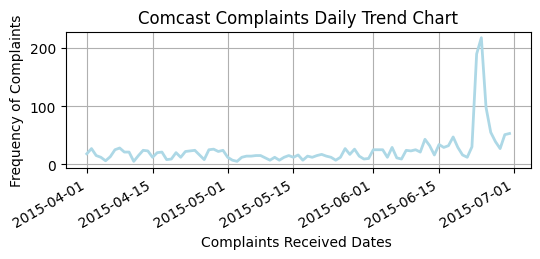

In [27]:
##############################################################################################################
# plot the daily trend of the complaints 
##############################################################################################################
com_sort.Date.value_counts().plot(figsize=(6,2),lw=2,color='lightblue')
plt.xlabel('Complaints Received Dates ')
plt.ylabel('Frequency of Complaints')
plt.title('Comcast Complaints Daily Trend Chart')
plt.grid(True)
plt.show()

# As said earlier June-24-2015,June-23-2015 and June-25-2015 was the peak

In [28]:
##############################################################################################################
# check the number of unique complaints
##############################################################################################################
com_sort['Customer Complaint'].nunique()

1841

In [29]:
##############################################################################################################
# cehck the top 5 and bottom 5 complaints
##############################################################################################################
com_sort['Customer Complaint'].value_counts().sort_values(ascending=False).head(20)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Comcast internet             8
Data Cap                     8
Comcast data cap             8
Comcast/Xfinity              8
Internet speed               8
COMCAST                      6
Billing                      6
Comcast Service              6
Comcast billing              6
Comcast service              6
Internet Speed               5
Name: Customer Complaint, dtype: int64

## Top 20 table of Complaint types

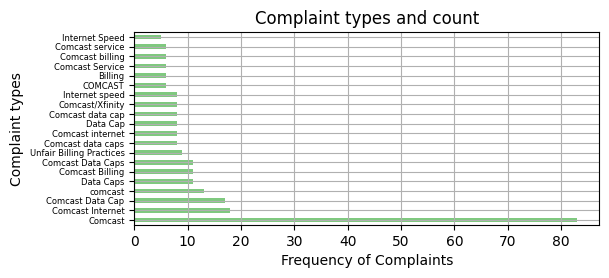

In [60]:
##############################################################################################################
# plot the graph of top 100 complaints
##############################################################################################################
plt.figure(figsize=(6,2.5))
com_sort['Customer Complaint'].value_counts().sort_values(ascending=False).head(20).plot.barh(colormap=plt.cm.Accent)
plt.xlabel('Frequency of Complaints')
plt.ylabel('Complaint types')
plt.yticks(fontsize=6)
plt.title('Complaint types and count')
plt.grid(True)
plt.show()

# Complaints under generic Comcast bucket received around 83 calls
# Rest are spread unformly in different types
# Above is the chart of top 20 complaint types

In [31]:
##############################################################################################################
# extract the complaints related to Internet/Network issues based on some key words and print the count
##############################################################################################################
Internet_issues =com_sort[com_sort['Customer Complaint'].str.contains('network')| \
                          com_sort['Customer Complaint'].str.contains('speed') | \
                          com_sort['Customer Complaint'].str.contains('data') | \
                          com_sort['Customer Complaint'].str.contains('internet') | \
                          com_sort['Customer Complaint'].str.contains('Network') | \
                          com_sort['Customer Complaint'].str.contains('Speed') | \
                          com_sort['Customer Complaint'].str.contains('Data') | \
                          com_sort['Customer Complaint'].str.contains('Internet') | \
                          com_sort['Customer Complaint'].str.contains('slow') | \
                          com_sort['Customer Complaint'].str.contains('Slow') | \
                          com_sort['Customer Complaint'].str.contains('avail') | \
                          com_sort['Customer Complaint'].str.contains('Avail') | \
                          com_sort['Customer Complaint'].str.contains('band') | \
                          com_sort['Customer Complaint'].str.contains('Band') | \
                          com_sort['Customer Complaint'].str.contains('usage') | \
                          com_sort['Customer Complaint'].str.contains('Usage') ].count() 

print('Number of Complaints Related to Internet/Network issues ',Internet_issues[0])

Number of Complaints Related to Internet/Network issues  844


## Complaints related to Internet/Network were 844 approximately

In [32]:
##############################################################################################################
# extract the complaits related to Billing issues based on some key words and print  the count
##############################################################################################################
Billing_issues=com_sort[com_sort['Customer Complaint'].str.contains('billing') | \
                        com_sort['Customer Complaint'].str.contains('bill') | \
                        com_sort['Customer Complaint'].str.contains('charge') | \
                        com_sort['Customer Complaint'].str.contains('pric') | \
                        com_sort['Customer Complaint'].str.contains('Billing') | \
                        com_sort['Customer Complaint'].str.contains('Charge') | \
                        com_sort['Customer Complaint'].str.contains('Bill') | \
                        com_sort['Customer Complaint'].str.contains('Pric') | \
                        com_sort['Customer Complaint'].str.contains('practices') | \
                        com_sort['Customer Complaint'].str.contains('Practices') | \
                        com_sort['Customer Complaint'].str.contains('fraud') | \
                        com_sort['Customer Complaint'].str.contains('Fraud') ].count() 

print('Number of Complaints Related to Billing issues ', Billing_issues[0])

Number of Complaints Related to Billing issues  613


## Complaints related to Billing issues were 613 approximately

In [33]:
##############################################################################################################
# extract the complaints related to customer service/support issues based on some keywords and print results
##############################################################################################################
Service_issues = com_sort[com_sort['Customer Complaint'].str.contains('service') | \
                          com_sort['Customer Complaint'].str.contains('Service') | \
                          com_sort['Customer Complaint'].str.contains('customer') | \
                          com_sort['Customer Complaint'].str.contains('Customer') | \
                          com_sort['Customer Complaint'].str.contains('support') | \
                          com_sort['Customer Complaint'].str.contains('Support') ].count()

print('Number of Complaints Related to Customer Service issues ',Service_issues[0])

Number of Complaints Related to Customer Service issues  500


## Complaints related to Customer Service were 500 approximately

In [34]:
##############################################################################################################
# print the count of all above 3 major issue complaints
##############################################################################################################
Major_issues = Internet_issues + Billing_issues + Service_issues

print('Total Number of Complaints Related to the above 3 Major issues ', Major_issues[0])

Total Number of Complaints Related to the above 3 Major issues  1957


In [35]:
##############################################################################################################
# print the count of other miscellanious issues related complaints
##############################################################################################################
other_issues = com_sort.shape[0] - Major_issues
print('Number of Complaints Related to Other issues ',other_issues[0])

Number of Complaints Related to Other issues  267


## Complaints related to Other issues were 267 approximately

In [36]:
##############################################################################################################
# create a dataframe to plot the graph of all major complaint types 
##############################################################################################################
df_issues = pd.DataFrame({'Internet':Internet_issues[0],'Billing':Billing_issues[0],'Customer Service':Service_issues[0], \
                          'Other': other_issues[0]},index=(range(1)))
                         
df_issues

,Internet,Billing,Customer Service,Other
0,844,613,500,267


<Figure size 600x200 with 0 Axes>

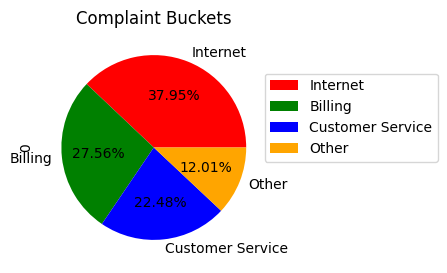

In [67]:

df_issues.T.plot(kind='pie',autopct="%0.2f%%",subplots=True,colors=['red','green','blue','orange'],figsize=(6,3))
plt.title('Complaint Buckets')
plt.legend(bbox_to_anchor=(0.95, 0.35, 0.5, 0.5))
plt.show()

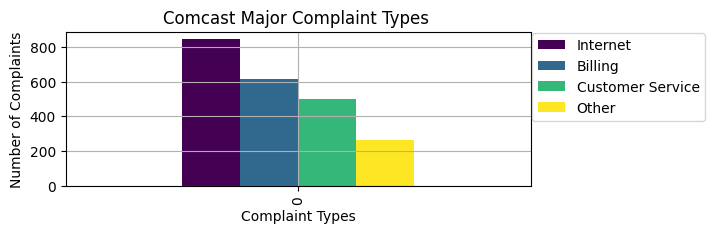

In [38]:
##############################################################################################################
# plot the graph of major issue/complaint types
##############################################################################################################
df_issues.plot.bar(figsize=(6,2),colormap='viridis')
plt.xlabel('Complaint Types')
plt.ylabel('Number of Complaints')
plt.title('Comcast Major Complaint Types ')
plt.legend(bbox_to_anchor=(0.89, 0.54, 0.5, 0.5))
plt.grid(True)
plt.show()

# Above is the chart of Major complaint types; Internet related is the top
# followed by Billing and Customer Service

In [39]:
##############################################################################################################
# check the top 5 records one more time before proceeding further
##############################################################################################################
com_sort.head()

,Customer Complaint,Date,Received Via,City,State,Zip code,New_Filing,New_Status
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,2015-04-01,Customer Care Call,Atlanta,Georgia,30312,0,Closed
2015-01-04,Incorrect Billing,2015-04-01,Customer Care Call,Boynton Beach,Florida,33426,0,Closed
2015-01-04,billing,2015-04-01,Customer Care Call,Stone Mountain,Georgia,30083,0,Closed
2015-01-04,Comcast refusal of service,2015-04-01,Customer Care Call,Wayne,Pennsylvania,19087,0,Closed
2015-01-04,Comcast,2015-04-01,Internet,North Huntingdon,Pennsylvania,15642,0,Closed


In [40]:
##############################################################################################################
# extract the complaints data by state wise and print top 5 records
##############################################################################################################
Complaints_by_state=com_sort.groupby(['State','New_Status']).size().unstack().fillna(0)
Complaints_by_state.head()

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


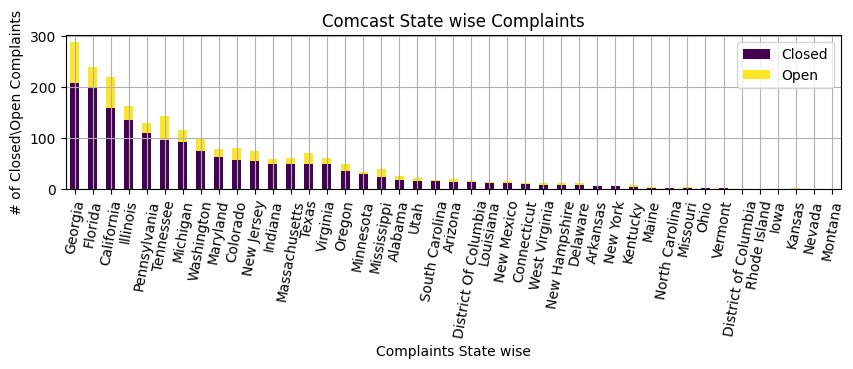

In [41]:
##############################################################################################################
# Sort the state wise data by closed cases wise to plot the graph
##############################################################################################################
Complaints_by_state.sort_values(by='Closed',ascending=False).plot.bar(figsize=(10,2),stacked=True,colormap='viridis')
plt.xlabel('Complaints State wise')
plt.ylabel('# of Closed\Open Complaints')
plt.title('Comcast State wise Complaints')
plt.xticks(rotation=80)
plt.legend()
plt.grid(True)
plt.show()


# Georgia has the highest complaints open and closed;
# followed by Florida, California and Illnois.
# Montana with least

In [42]:
##############################################################################################################
# print the top 6 records from the above sorted file
##############################################################################################################
Complaints_by_state.sort_values(by='Closed',ascending=False).head(6)

New_Status,Closed,Open
State,,
Georgia,208.0,80.0
Florida,201.0,39.0
California,159.0,61.0
Illinois,135.0,29.0
Pennsylvania,110.0,20.0
Tennessee,96.0,47.0


In [43]:
##############################################################################################################
# Check the data in the newly created status field and see how many are open and how many closed
##############################################################################################################
com_sort['New_Status'].value_counts()

Closed    1707
Open       517
Name: New_Status, dtype: int64

In [44]:
##############################################################################################################
# extract the data of open complaints for each state and print the top 5 states with most open cases
##############################################################################################################
Open_Complaints=com_sort.groupby(['State','New_Status']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
Open_Complaints.head()

New_Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0


In [45]:
##############################################################################################################
# create a new field to populate the percentage of open cases data, and print the top 5 states with high perc.
##############################################################################################################
Open_Complaints['Open_Percentage']=(Open_Complaints['Open']/Open_Complaints['Open'].sum())*100
Open_Complaints.head()

New_Status,Closed,Open,Open_Percentage
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284


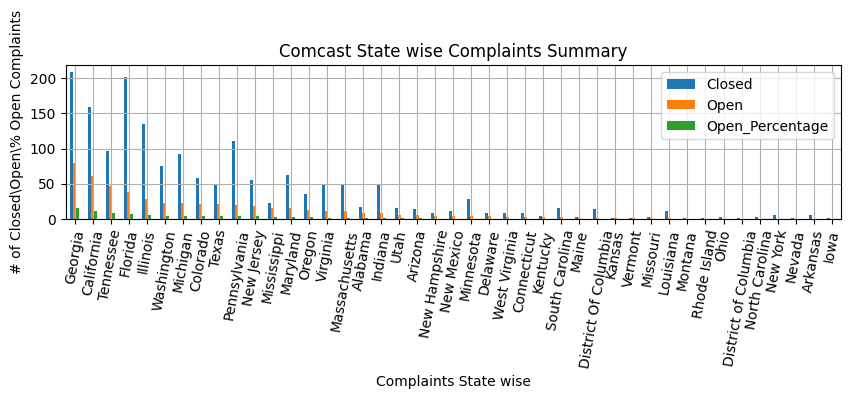

In [46]:
##############################################################################################################
# plot the graph of open/closed/open_percentage for each state
##############################################################################################################
Open_Complaints.plot(kind='bar',figsize=(10,2))
plt.xlabel('Complaints State wise')
plt.ylabel('# of Closed\Open\% Open Complaints')
plt.title('Comcast State wise Complaints Summary')
plt.xticks(rotation=80)
plt.legend()
plt.grid(True)
plt.show()

# Again Georgia has the highest percentage of unresolved complaints,
# followed by California,Tennessee, Florida and Illnois

In [47]:
##############################################################################################################
# extract the data of Received Via field along with the stauts of the cases
##############################################################################################################
Closed_complaints=com_sort.groupby(['Received Via','New_Status']).size().unstack().fillna(0)

In [48]:
##############################################################################################################
# print the above extracted data to see how many and open and how many closed customer care/internet types
##############################################################################################################
Closed_complaints.head()

New_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [49]:
##############################################################################################################
# Create a new field to populate the percentage of cases closed cases
##############################################################################################################
Closed_complaints['Closed_Percentage'] = Closed_complaints['Closed']/Closed_complaints['Closed'].sum()*100
Closed_complaints.head()

New_Status,Closed,Open,Closed_Percentage
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


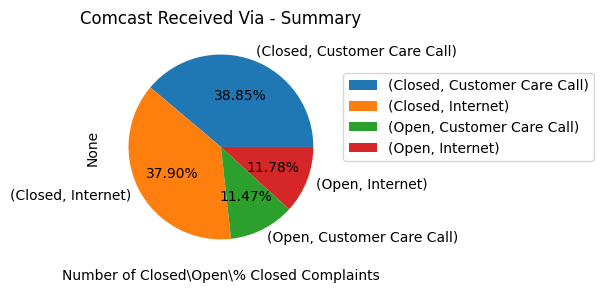

In [69]:
##############################################################################################################
# plot the graph of closed/open/closed percenatge data for Received Via field
##############################################################################################################
Closed_complaints[['Closed','Open']].unstack().T.plot(kind='pie',figsize=(6,3),autopct='%.2f%%')

plt.xlabel('Number of Closed\Open\% Closed Complaints')
plt.title('Comcast Received Via - Summary')
plt.legend(bbox_to_anchor=(1.0, 0.35, 0.5, 0.5))
plt.show()

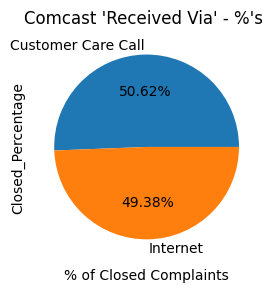

In [70]:
##############################################################################################################
# plot the graph of closed/open/closed percenatge data for Received Via field
##############################################################################################################
Closed_complaints['Closed_Percentage'].T.plot(kind='pie',figsize=(6,3),autopct='%.2f%%')

plt.xlabel('% of Closed Complaints')
plt.title("Comcast 'Received Via' - %'s ")

plt.show()

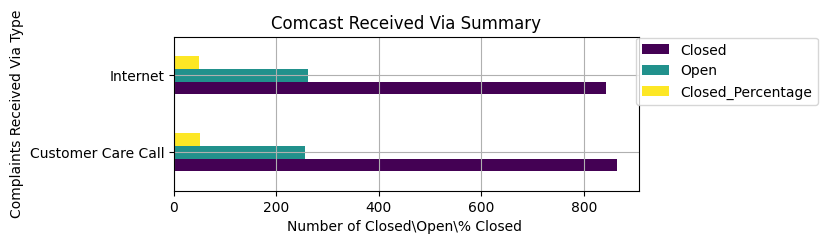

In [52]:
##############################################################################################################
# plot the graph of closed/open/closed percenatge data for Received Via field
##############################################################################################################
Closed_complaints.plot(kind='barh',figsize=(6,2),colormap='viridis')
plt.ylabel('Complaints Received Via Type')
plt.xlabel('Number of Closed\Open\% Closed ')
plt.title('Comcast Received Via Summary')
plt.legend(bbox_to_anchor=(0.9, 0.54, 0.5, 0.5))
plt.grid(True)
plt.show()

# Open and closed compalint percentages are spread evenly among the
# two types of channels through which compliants were registered.